In [31]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

img_height, img_width = 28, 28
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

num_classes = len(train_generator.class_indices)
print(f"Number of classes (letters): {num_classes}")

Found 7886 images belonging to 63 classes.
Found 1947 images belonging to 63 classes.
Number of classes (letters): 63


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 63)             │        32,319 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,039 (746.25 KB)

 Trainable params: 191,039 (746.25 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.1017 - loss: 3.5338 - val_accuracy: 0.4093 - val_loss: 1.6327
Epoch 2/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.4408 - loss: 1.5171 - val_accuracy: 0.5403 - val_loss: 1.1679
Epoch 3/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.5415 - loss: 1.1414 - val_accuracy: 0.5660 - val_loss: 1.0291
Epoch 4/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6178 - loss: 0.9465 - val_accuracy: 0.5917 - val_loss: 0.9352
Epoch 5/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.6525 - loss: 0.8539 - val_accuracy: 0.6266 - val_loss: 0.8673
Epoch 6/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.6824 - loss: 0.7598 - val_accuracy: 0.6323 - val_loss: 0.8688
Epoch 7/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.7034 - loss: 0.7166 - val_accuracy: 0.6533 - val_loss: 0.8317
Epoch 8/10
247/247 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.7393 - loss: 0.6297 - val_accu

In [34]:
model.save('letter_recognizer_model.keras')

In [35]:
from tensorflow.keras.preprocessing import image

img_path = 'test letter.png'
img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)
labels = list(train_generator.class_indices.keys())
predicted_letter = labels[predicted_class_index]

print(f"Predicted Letter: {predicted_letter}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted Letter: bo_bu


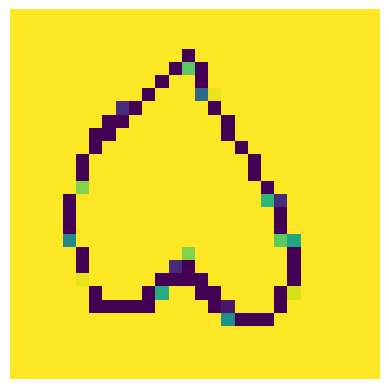

In [36]:
plt.imshow(img)
plt.axis('off')
plt.show()